## Name : W.A.D.Chathuranga
## Reg. No. : 16APP2652
### Project : DM Project (Titanic - Machine Learning from Disaster)

In [1]:
# ---------- The project plan ----------

# (1)  Introduction
# (2)  Import Required Libraries & Datasets
# (3)  Data Description
# (4)  Exploratory Data Analysis (EDA)
          # (4.1) Summary statistics
          # (4.2) Shape of Datasets
          # (4.3) Data types 
          # (4.4) Missing data
          # (4.5) Feature analysis
                     # (4.5.1) Categorical data analysis
                     # (4.5.2) Numerical data analysis
# (5)  Data preprocessing
          # (5.1) Duplicated records handling
          # (5.2) Data Transformation
          # (5.3) Handle the Missing Values
# (6)  Feature engineering
# (7)  Feature encoding
# (8)  Splitting Dataset
# (9)  Feature scaling
# (10) Create Model 
# (11) Hyperparameter Tuning
# (12) Model Evaluation
          # (12.1) Random Forest Classifier
          # (12.2) Gaussian Naive Bayes Classifier 
          # (12.3) Model comparison
# (13) Final Submission
          # (13.1) Random Forest Submission
          # (13.2) Naive Bayes Submission

# 1. Introduction

The project is based on the Kaggle competition which is “Titanic - Machine Learning from Disaster”. 

# 2. Import Required Libraries & Datasets

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('darkgrid')

In [3]:
# load datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
# train dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# test dataset
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3. Data Description

* PassengerId	It is a unique number automatically attributed to each passenger.
* Survival	Survival (0 = No, 1 = Yes)
* Pclass	Ticket class (1 = Upper, 2 = Middle, 3 = Lower)
* Sex	Sex (Male, Female)
* Age	Age in years
* SibSp	Number of siblings (brother, sister, stepbrother, stepsister) / spouses (husband, wife) (mistresses and fiancés were   ignored) aboard the Titanic
* Parch	Number of parents (mother, father) /children aboard the Titanic
* Ticket	Ticket number
* Fare	Fare of the ticket
* Cabin	Cabin number
* Embarked	Port of Embarkation (C = Cherbourg, Q = Queenstown, 
* S = Southampton)

# 4. Exploratory Data Analysis (EDA)

### 4.1. Summary statistics

In [6]:
# statistical description summary of training dataset
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# statistical description summary of testing dataset
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 4.2. Shape of Datasets

In [8]:
# shape of datasets
print("Training set shape: ", train_data.shape)
print("Test set shape: ", test_data.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


### 4.3. Data types

In [9]:
# train dataset info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# test dataset info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 4.4. Missing data

In [11]:
# check null values of training set
train_data.isnull().sum(axis=0).sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

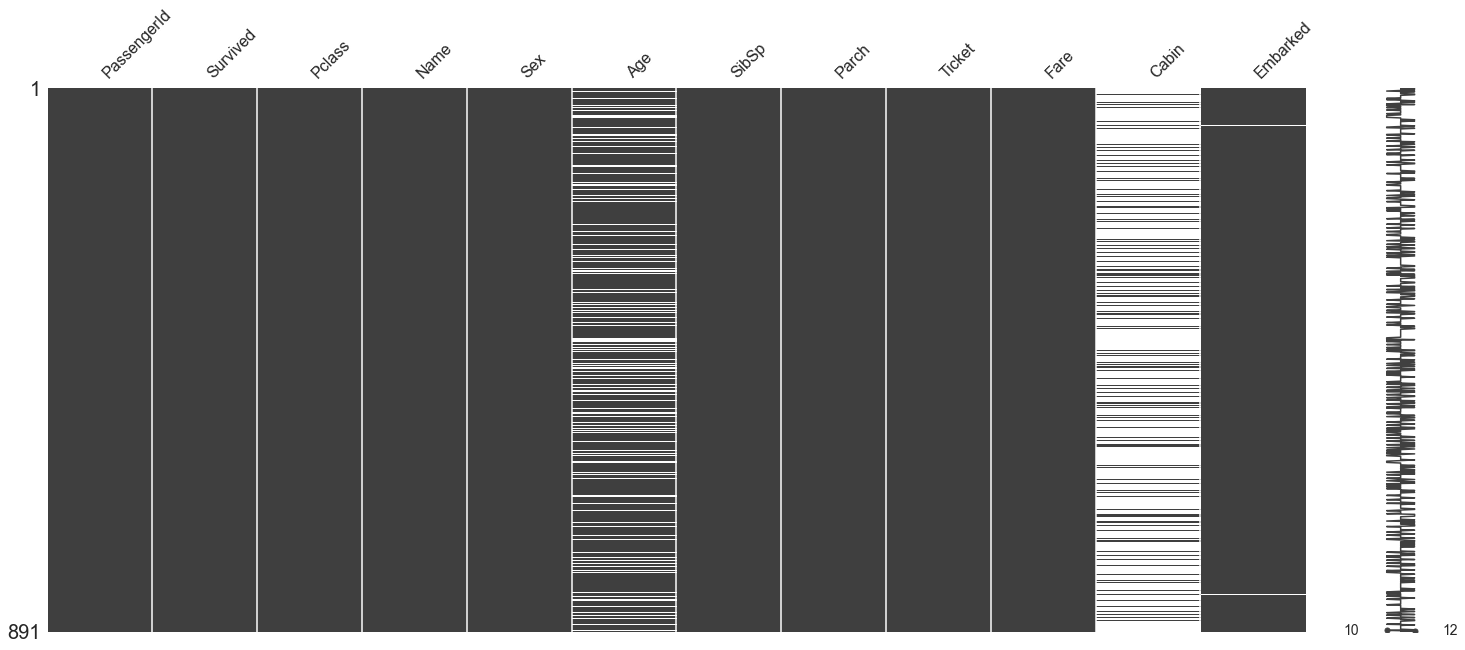

In [12]:
# Missing data in training set
missingno.matrix(train_data)
plt.show()

In [13]:
# check null values of testing set
test_data.isnull().sum(axis=0).sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

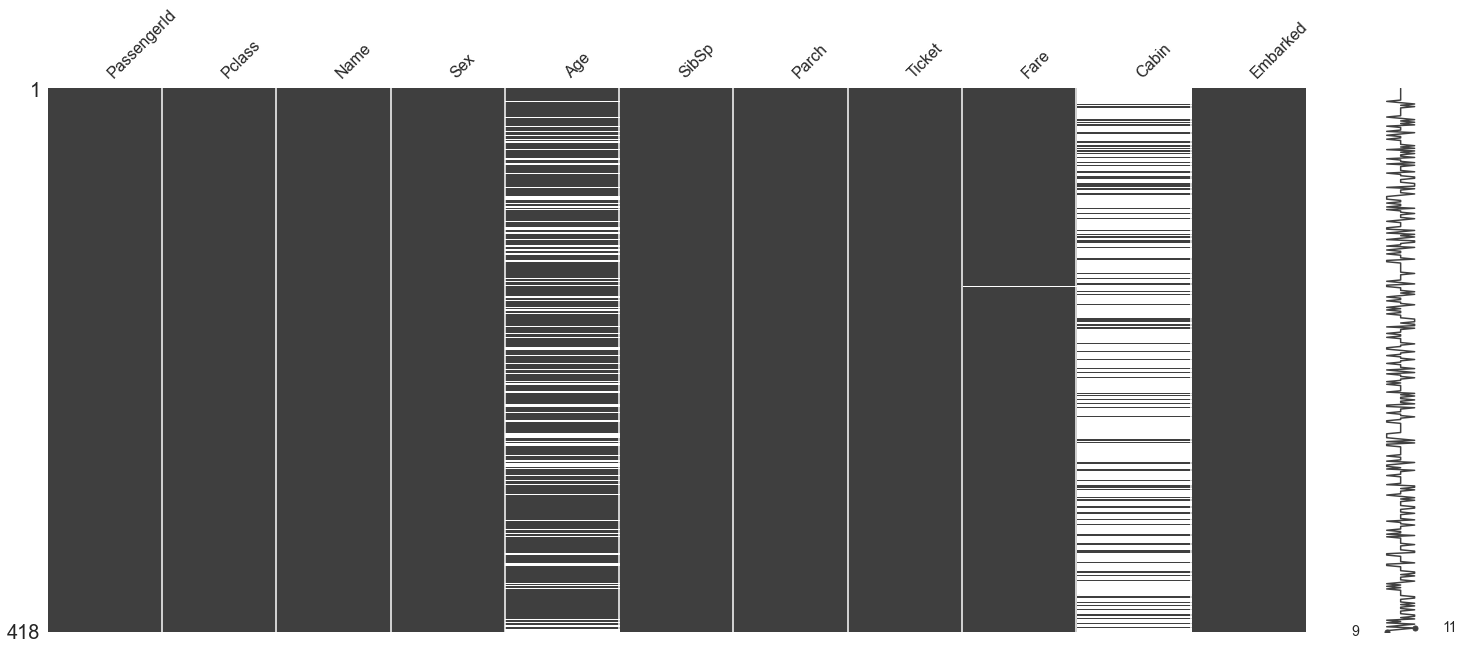

In [14]:
# Missing data in tesing set
missingno.matrix(test_data)
plt.show()

### 4.5. Feature analysis

### 4.5.1. Categorical data analysis (without drop null values)

#### Target feature: Survived

In [15]:
# value count of the Sex column
train_data['Survived'].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

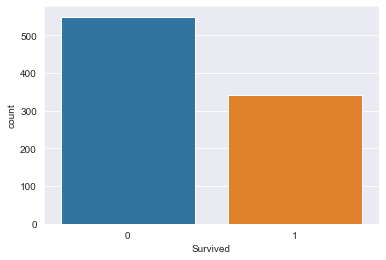

In [16]:
sns.countplot(train_data['Survived'])
plt.show()

In [17]:
# survived probability as value
train_data['Survived'].value_counts()/len(train_data)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

#### Categorical feature: Sex

In [18]:
# value count of the Sex column
train_data['Sex'].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

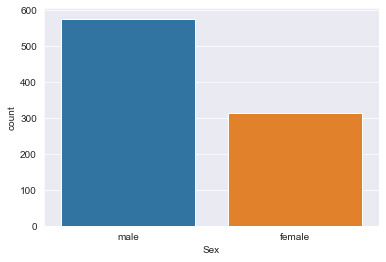

In [19]:
#
sns.countplot(train_data['Sex'])
plt.show()

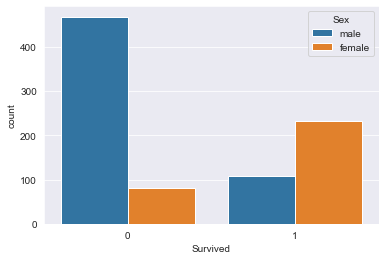

In [20]:
#
#plt.figure(figsize = (5,5))
sns.countplot(x='Survived', hue='Sex', data=train_data) #palette='RdBu_r'
plt.show()

In [21]:
# check survival probability according to gender(Sex)
train_data[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


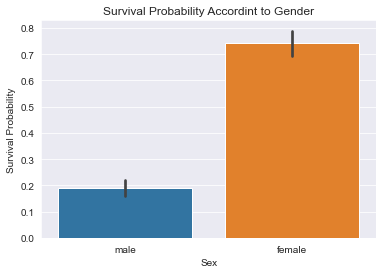

In [22]:
#plt.figure(figsize = (5,5))
sns.barplot(x='Sex', y='Survived', data=train_data) #palette='RdBu_r'
plt.title('Survival Probability Accordint to Gender')
plt.xlabel('Sex')
plt.ylabel('Survival Probability')
plt.show()

#### Categorical feature: Pclass

In [23]:
# Value counts of the Pclass column 
train_data['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

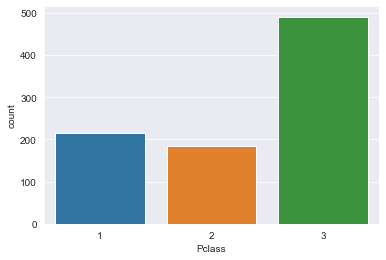

In [24]:
#
sns.countplot(train_data['Pclass'])
plt.show()

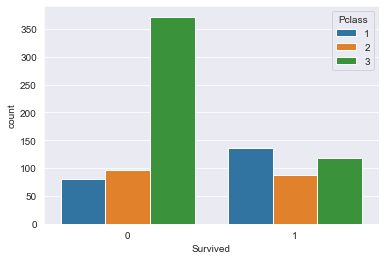

In [25]:
#plt.figure(figsize = (5,5))
sns.countplot(x='Survived', hue='Pclass', data=train_data) #palette='YlGnBu'
plt.show()

In [26]:
# check survival probability according to Pclass
train_data[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


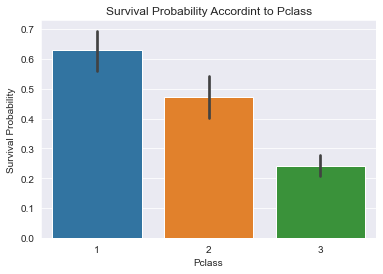

In [27]:
#plt.figure(figsize = (5,5))
sns.barplot(x='Pclass', y='Survived', data=train_data) #palette='YlGnBu'
plt.title('Survival Probability Accordint to Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Probability')
plt.show()

#### Categorical feature: Embarked

In [28]:
# Value counts of the Embarked column 
train_data['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

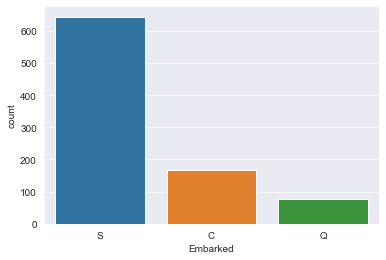

In [29]:
#
sns.countplot(train_data['Embarked'])
plt.show()

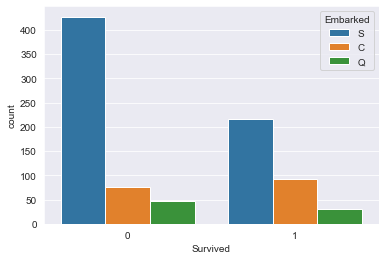

In [30]:
#plt.figure(figsize = (5,5))
sns.countplot(x='Survived', hue='Embarked', data=train_data)
plt.show()

In [31]:
# check survival probability according to Embarked
train_data[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


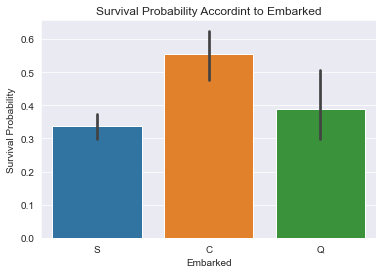

In [32]:
#plt.figure(figsize = (5,5))
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.title('Survival Probability Accordint to Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Probability')
plt.show()

#### Visualize Survived probability with Sex and Pclass 

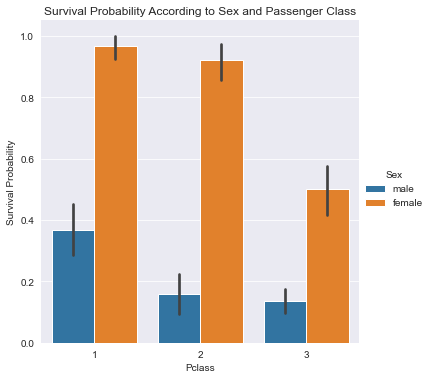

In [33]:
# Survival according to gender and passenger class (Pclass)
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train_data, kind='bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability According to Sex and Passenger Class')
plt.show()

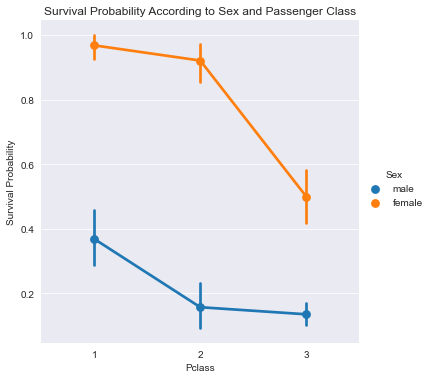

In [34]:
# Survival according to gender and passenger class (Pclass)
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train_data, kind='point')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability According to Sex and Passenger Class')
plt.show()

#### Visualize Survived probability with Embarked and Pclass 

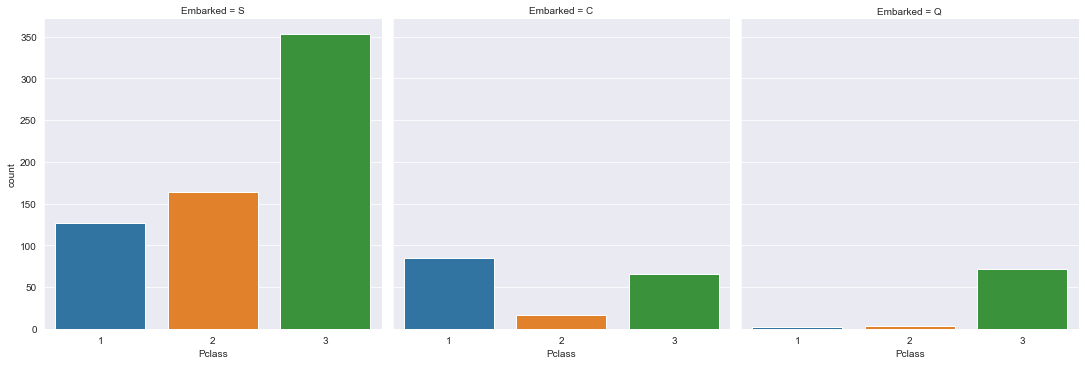

In [35]:
#
sns.factorplot('Pclass', col='Embarked', data=train_data, kind='count')
plt.show()

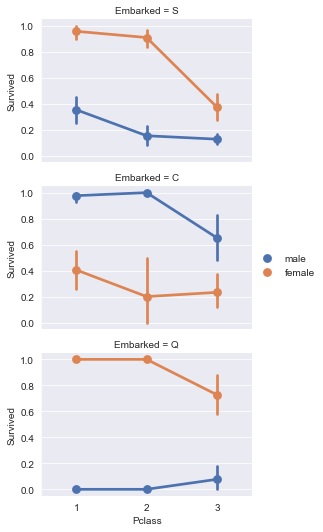

In [36]:
# Survival probability by all categorical variables

grid = sns.FacetGrid(train_data, row = 'Embarked', size = 2.5, aspect = 1.5)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()
plt.show()

### 4.5.2. Numerical data analysis

#### Outliers Handling - training set

In [37]:
""""
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
"""
from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

In [38]:
outliers_to_drop = detect_outliers(train_data, 2, ['SibSp', 'Parch', 'Age', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [39]:
# filtered ouliers records of train data
train_data.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [40]:
# Drop outliers and reset index in training set
print("Before: {} rows".format(len(train_data)))
train_data = train_data.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train_data)))

Before: 891 rows
After: 881 rows


#### Outliers Handling - testing set

In [41]:
outliers_to_drop_fromTestSet = detect_outliers(test_data, 2, ['SibSp', 'Parch', 'Age', 'Fare'])
print("We will drop these {} indices from Test dataset: ".format(len(outliers_to_drop_fromTestSet)), outliers_to_drop_fromTestSet)

We will drop these 0 indices from Test dataset:  []


In [42]:
# filtered ouliers records of train data
test_data.loc[outliers_to_drop_fromTestSet, :]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [43]:
# Drop outliers and reset index in testing set
print("Before: {} rows".format(len(test_data)))
test_data = test_data.drop(outliers_to_drop_fromTestSet, axis=0).reset_index(drop=True)
print("After: {} rows".format(len(test_data)))

Before: 418 rows
After: 418 rows


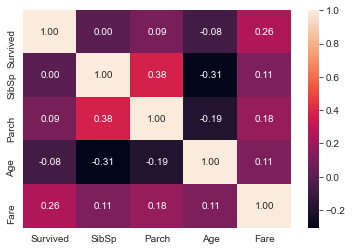

In [44]:
# Numerical variables correlation with survival
sns.heatmap(train_data[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, fmt='.2f')
plt.show()

#### Numerical variable: SibSp

In [45]:
# Value counts of the SibSp column 
train_data['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

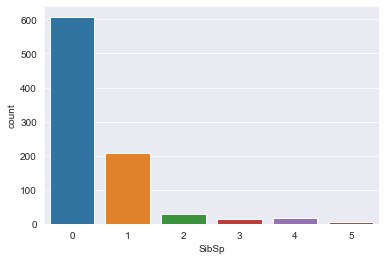

In [46]:
#
sns.countplot(train_data['SibSp'])
plt.show()

In [47]:
# Mean of survival by SibSp

train_data[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


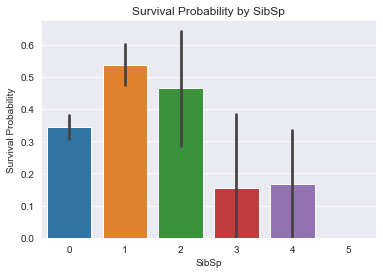

In [48]:
# 
sns.barplot(x = 'SibSp', y ='Survived', data = train_data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')
plt.show()

#### Numerical variable: Parch

In [49]:
# Value counts of the Parch column 
train_data['Parch'].value_counts(dropna = False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

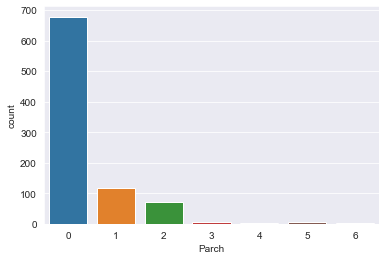

In [50]:
#
sns.countplot(train_data['Parch'])
plt.show()

In [51]:
# Mean of survival by Parch
train_data[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


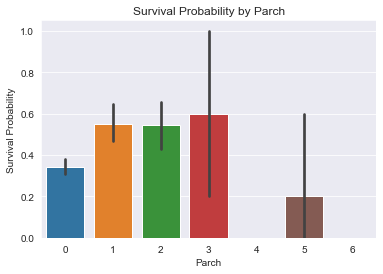

In [52]:
sns.barplot(x='Parch', y='Survived', data=train_data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')
plt.show()

#### Numerical variable: Age

In [53]:
# Null values in Age column 
train_data['Age'].isnull().sum()

170

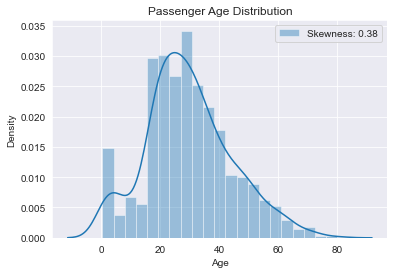

In [54]:
# Passenger age distribution

sns.distplot(train_data['Age'], label='Skewness: %.2f'%(train_data['Age'].skew()))
plt.legend(loc='best')
plt.title('Passenger Age Distribution')
plt.show()

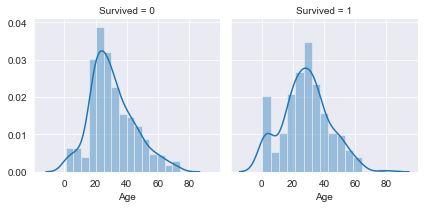

In [55]:
# Age distribution by survival

g = sns.FacetGrid(train_data, col='Survived')
g.map(sns.distplot,'Age', bins=15)
plt.show()

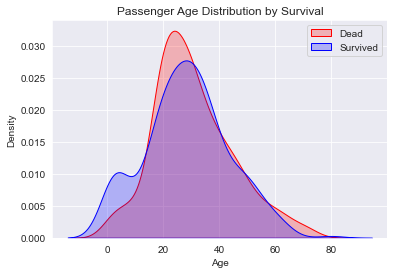

In [56]:
# 
sns.kdeplot(train_data['Age'][train_data['Survived']==0], color='r', shade=True, label='Dead')
sns.kdeplot(train_data['Age'][train_data['Survived']==1], color='b', shade=True, label='Survived')
plt.legend(loc='best')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')
plt.show()

#### Numerical variable: Fare

In [57]:
# Null values of Fare column 
train_data['Fare'].isnull().sum()

0

In [58]:
sum(train_data['Fare']<=0)

15

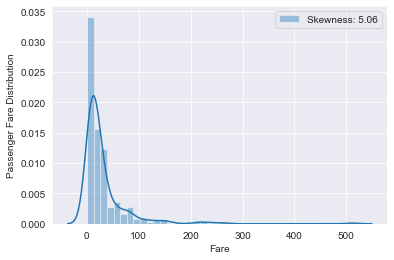

In [59]:
# Passenger fare distribution

sns.distplot(train_data['Fare'], bins=40, label='Skewness: %.2f'%(train_data['Fare'].skew()))
plt.legend(loc='best')
plt.ylabel('Passenger Fare Distribution')
plt.show()

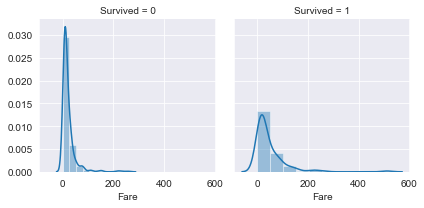

In [60]:
g = sns.FacetGrid(train_data, col = 'Survived')
g.map(sns.distplot, 'Fare', bins=10)
plt.show()

# 5. Data preprocessing

### 5.1. Duplicated  records handling

#### # For Training dataset

In [61]:
# get duplicated data rows count of training set
train_data.duplicated().sum()

0

In [62]:
# drop the duplicates data rows except first occurance, if available duplicated data rows
train_data = train_data.drop_duplicates(keep='first')

#### # For Testing Dataset

In [63]:
# get duplicated data rows count of testing set
test_data.duplicated().sum()

0

In [64]:
# drop the duplicates data rows except first occurance, if available duplicated data rows
test_data = test_data.drop_duplicates(keep='first')

### 5.2. Data Transformation

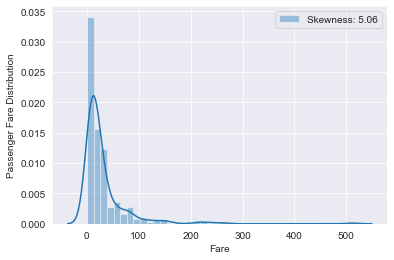

In [65]:
# Passenger fare distribution

sns.distplot(train_data['Fare'], bins=40, label='Skewness: %.2f'%(train_data['Fare'].skew()))
plt.legend(loc='best')
plt.ylabel('Passenger Fare Distribution')
plt.show()

In [66]:
# Apply log transformation to Fare column to reduce skewness

train_data['Fare'] = train_data['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

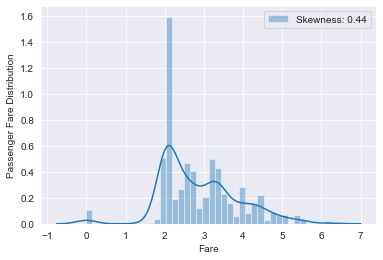

In [67]:
# Passenger fare distribution

sns.distplot(train_data['Fare'], bins=40, label='Skewness: %.2f'%(train_data['Fare'].skew()))
plt.legend(loc='best')
plt.ylabel('Passenger Fare Distribution')
plt.show()

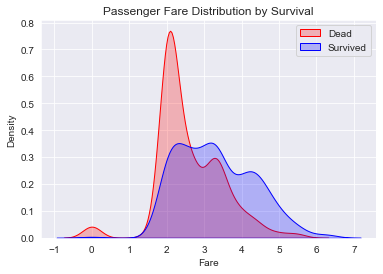

In [68]:
# 
sns.kdeplot(train_data['Fare'][train_data['Survived']==0], color='r', shade=True, label='Dead')
sns.kdeplot(train_data['Fare'][train_data['Survived']==1], color='b', shade=True, label='Survived')
plt.legend(loc='best')
plt.xlabel('Fare')
plt.title('Passenger Fare Distribution by Survival')
plt.show()

### 5.3. Handle the Missing Values (Drop or Fill)

#### # For Training dataset

In [69]:
# missing values in train set
train_data.isnull().sum(axis=0).sort_values(ascending = False)

Cabin          680
Age            170
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [70]:
# fill null values of age column of training set using its own column average/mean
mean_of_age_column_fromTrain = train_data["Age"].dropna().mean()
train_data['Age'].fillna(mean_of_age_column_fromTrain, inplace=True)

In [71]:
# fill null values of embarked column of training set using its the most frequent value
mode_of_embarked_column = train_data['Embarked'].dropna().mode()[0]
train_data['Embarked'].fillna(mode_of_embarked_column, inplace = True)

In [72]:
# define column names that you want to drop from training dataset
columns_to_drop_fromTrain = ["PassengerId","Ticket","Cabin"]

# drop columns from training dataset
cleaned_train_data = train_data.drop(columns_to_drop_fromTrain, axis=1)

In [73]:
cleaned_train_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [74]:
cleaned_train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1.981001,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.266662,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.070022,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3.972177,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,2.085672,S


In [75]:
# shape of cleaned train dataset
cleaned_train_data.shape

(881, 9)

#### # For Testing Dataset

In [76]:
# missing values in test set
test_data.isnull().sum(axis=0).sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [77]:
# fill null values of age column of testing set using its own column average/mean 
mean_of_age_column_fromTest = test_data["Age"].mean()
test_data['Age'].fillna(mean_of_age_column_fromTest, inplace=True)

In [78]:
# fill null values of fare column of testing set using its own column average/mean 
mean_of_fare_column_fromTest = test_data["Fare"].mean()
test_data['Fare'].fillna(mean_of_fare_column_fromTest, inplace=True)

In [79]:
# define column names that you want to drop fron testing dataset
columns_to_drop_fromTest = ["PassengerId","Ticket","Cabin"]

# drop columns fron testing dataset
cleaned_test_data = test_data.drop(columns_to_drop_fromTest, axis=1)

In [80]:
cleaned_test_data.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [81]:
cleaned_test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [82]:
# 
cleaned_test_data.shape

(418, 8)

# 6. Feature engineering

### 6.1. Feature engineering: Name => Title

#### # For Training Dataset

In [83]:
# Get title from name
cleaned_train_data['Title'] = [name.split(',')[1].split('.')[0].strip() for name in cleaned_train_data['Name']]
cleaned_train_data[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [84]:
# Value counts of Title
cleaned_train_data['Title'].value_counts()

Mr              513
Miss            177
Mrs             125
Master           39
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Mme               1
the Countess      1
Lady              1
Jonkheer          1
Ms                1
Don               1
Sir               1
Capt              1
Name: Title, dtype: int64

In [85]:
# Simplify title
cleaned_train_data['Title'] = cleaned_train_data['Title'].replace(['Dr','Rev','Col','Major','Lady','Don','Jonkheer',
                                                                   'the Countess','Sir','Capt'], 'Rare')
cleaned_train_data['Title'] = cleaned_train_data['Title'].replace(['Mlle','Ms'], 'Miss')
cleaned_train_data['Title'] = cleaned_train_data['Title'].replace('Mme','Mrs')

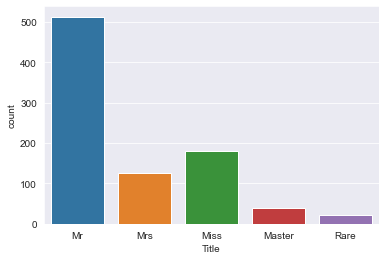

In [86]:
sns.countplot(cleaned_train_data['Title'])
plt.show()

In [87]:
# Mean of survival by name title
cleaned_train_data[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


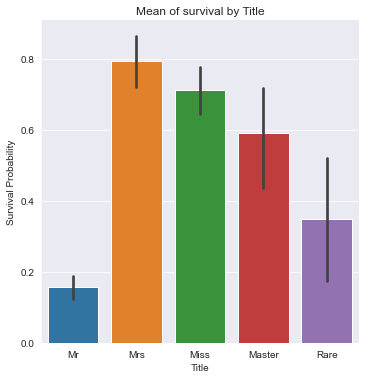

In [88]:
sns.catplot(x='Title', y='Survived', data=cleaned_train_data, kind='bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')
plt.show()

In [89]:
# Drop name column
cleaned_train_data = cleaned_train_data.drop('Name', axis = 1)
cleaned_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,1.981001,S,Mr
1,1,1,female,38.0,1,0,4.266662,C,Mrs
2,1,3,female,26.0,0,0,2.070022,S,Miss
3,1,1,female,35.0,1,0,3.972177,S,Mrs
4,0,3,male,35.0,0,0,2.085672,S,Mr


#### # For Testing Dataset

In [90]:
# Get title from name
cleaned_test_data['Title'] = [name.split(',')[1].split('.')[0].strip() for name in cleaned_test_data['Name']]
cleaned_test_data[['Name', 'Title']].head()

,Name,Title
0,"Kelly, Mr. James",Mr
1,"Wilkes, Mrs. James (Ellen Needs)",Mrs
2,"Myles, Mr. Thomas Francis",Mr
3,"Wirz, Mr. Albert",Mr
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs


In [91]:
# Value counts of Title
cleaned_test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [92]:
# Simplify title
cleaned_test_data['Title'] = cleaned_test_data['Title'].replace(['Col','Rev','Dona','Dr'], 'Rare')
cleaned_test_data['Title'] = cleaned_test_data['Title'].replace('Ms', 'Miss')

In [93]:
# Drop name column
cleaned_test_data = cleaned_test_data.drop('Name', axis = 1)
cleaned_test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,Q,Mr
1,3,female,47.0,1,0,7.0000,S,Mrs
2,2,male,62.0,0,0,9.6875,Q,Mr
3,3,male,27.0,0,0,8.6625,S,Mr
4,3,female,22.0,1,1,12.2875,S,Mrs


### 6.2. Feature engineering: SibSp + Parch => FamilySize => IsAlone

#### # For Training Dataset

In [94]:
# Calculate family size from SibSp and Parch
cleaned_train_data['FamilySize'] = cleaned_train_data['SibSp'] + cleaned_train_data['Parch'] + 1
cleaned_train_data[['SibSp', 'Parch', 'FamilySize']].head()

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [95]:
# Mean of survival by family size
cleaned_train_data[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000


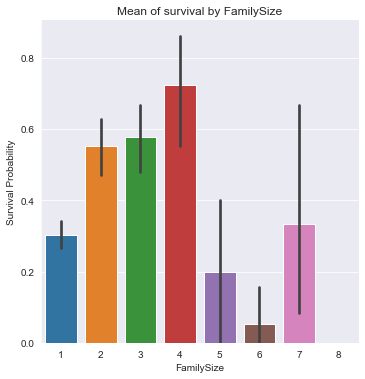

In [96]:
sns.catplot(x='FamilySize', y='Survived', data=cleaned_train_data, kind='bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by FamilySize')
plt.show()

In [97]:
# Create IsAlone feature/column
cleaned_train_data['IsAlone']=0
cleaned_train_data.loc[cleaned_train_data['FamilySize']==1, 'IsAlone']=1

In [98]:
# Mean of survival by IsAlone
cleaned_train_data[['IsAlone','Survived']].groupby('IsAlone', as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


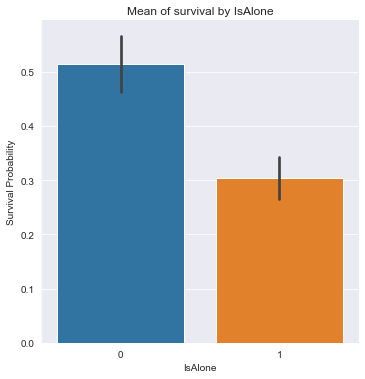

In [99]:
sns.catplot(x='IsAlone', y='Survived', data=cleaned_train_data, kind='bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by IsAlone')
plt.show()

In [100]:
# Drop SibSp, Parch and FamilySize features from combine dataframe
cleaned_train_data = cleaned_train_data.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
cleaned_train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,male,22.0,1.981001,S,Mr,0
1,1,1,female,38.0,4.266662,C,Mrs,0
2,1,3,female,26.0,2.070022,S,Miss,1
3,1,1,female,35.0,3.972177,S,Mrs,0
4,0,3,male,35.0,2.085672,S,Mr,1


#### # For Testing Dataset

In [101]:
# Calculate family size from SibSp and Parch
cleaned_test_data['FamilySize'] = cleaned_test_data['SibSp'] + cleaned_test_data['Parch'] + 1
cleaned_test_data[['SibSp', 'Parch', 'FamilySize']].head()

,SibSp,Parch,FamilySize
0,0,0,1
1,1,0,2
2,0,0,1
3,0,0,1
4,1,1,3


In [102]:
# Create IsAlone feature
cleaned_test_data['IsAlone']=0
cleaned_test_data.loc[cleaned_test_data['FamilySize']==1, 'IsAlone']=1

In [103]:
# Drop SibSp, Parch and FamilySize features from combine dataframe
cleaned_test_data = cleaned_test_data.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
cleaned_test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,male,34.5,7.8292,Q,Mr,1
1,3,female,47.0,7.0000,S,Mrs,0
2,2,male,62.0,9.6875,Q,Mr,1
3,3,male,27.0,8.6625,S,Mr,1
4,3,female,22.0,12.2875,S,Mrs,0


# 7. Feature encoding

 Nominal Encoding: — Where Order of data does not matter. In Nominal Encoding we have various techniques:
*    One Hot Encoding
*    One Hot Encoding With Many Categories
*    Mean Encoding
    
Ordinal Encoding: — Where Order of data matters. In Ordinal Encoding we also have various techniques:
*    Label Encoding
*    Target Guided Ordinal Encoding

#### # For Training Dataset

In [104]:
# tranform string data of column Sex to numerical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Lb_Encoder = LabelEncoder()
cleaned_train_data["Sex"] = Lb_Encoder.fit_transform(cleaned_train_data["Sex"])
cleaned_train_data["Embarked"] = Lb_Encoder.fit_transform(cleaned_train_data["Embarked"])

enc = OneHotEncoder()
# transforming the column after fitting
enc_train = enc.fit_transform(cleaned_train_data[["Title"]]).toarray()
# converting arrays to a dataframe
encoded_colm_train = pd.DataFrame(enc_train)
# concating dataframes
cleaned_train_data = pd.concat([cleaned_train_data, encoded_colm_train], axis = 1)
# removing the encoded column.
cleaned_train_data = cleaned_train_data.drop(['Title'], axis = 1)

cleaned_train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,0,1,2,3,4
0,0,3,1,22.0,1.981001,2,0,0.0,0.0,1.0,0.0,0.0
1,1,1,0,38.0,4.266662,0,0,0.0,0.0,0.0,1.0,0.0
2,1,3,0,26.0,2.070022,2,1,0.0,1.0,0.0,0.0,0.0
3,1,1,0,35.0,3.972177,2,0,0.0,0.0,0.0,1.0,0.0
4,0,3,1,35.0,2.085672,2,1,0.0,0.0,1.0,0.0,0.0


#### # For Testing Dataset

In [105]:
cleaned_test_data["Sex"] = Lb_Encoder.fit_transform(cleaned_test_data["Sex"])
cleaned_test_data["Embarked"] = Lb_Encoder.fit_transform(cleaned_test_data["Embarked"])

# transforming the column after fitting
enc_test = enc.fit_transform(cleaned_test_data[["Title"]]).toarray()
# converting arrays to a dataframe
encoded_colm_test = pd.DataFrame(enc_test)
# concating dataframes
cleaned_test_data = pd.concat([cleaned_test_data, encoded_colm_test], axis = 1)
# removing the encoded column.
cleaned_test_data = cleaned_test_data.drop(['Title'], axis = 1)

cleaned_test_data.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone,0,1,2,3,4
0,3,1,34.5,7.8292,1,1,0.0,0.0,1.0,0.0,0.0
1,3,0,47.0,7.0000,2,0,0.0,0.0,0.0,1.0,0.0
2,2,1,62.0,9.6875,1,1,0.0,0.0,1.0,0.0,0.0
3,3,1,27.0,8.6625,2,1,0.0,0.0,1.0,0.0,0.0
4,3,0,22.0,12.2875,2,0,0.0,0.0,0.0,1.0,0.0


# 8. Models Create, Model Train, Make Predictions and Model   Evaluation

## 8.1. Using Only Train dataset both train and test

In [106]:
x = cleaned_train_data.drop('Survived', axis=1)
y = cleaned_train_data['Survived']

### 8.1.1. Random Forest Classifier

In [107]:
#spliting the dataset
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=0)

# normalization
from sklearn.preprocessing import MinMaxScaler
minMax_scaler = MinMaxScaler()
train_x = minMax_scaler.fit_transform(train_x)
test_x = minMax_scaler.fit_transform(test_x)  

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

from sklearn.ensemble import RandomForestClassifier

rf_classifier1 = RandomForestClassifier(random_state=0)
rf_classifier1.fit(train_x, train_y)

rf_pred = rf_classifier1.predict(test_x)

rf_acc = accuracy_score(test_y, rf_pred)
print('Random Forest Model Accuracy Score =', round(rf_acc*100, 2),'%')

Random Forest Model Accuracy Score = 82.64 %


In [108]:
# Decision Tree Mean cross validation score
rf_score1 = cross_val_score(rf_classifier1, train_x, train_y, scoring='accuracy', cv=10).mean()
print('Cross validation score =', round(rf_score1*100,2), '%')

Cross validation score = 79.88 %


In [109]:
# confusion matrix
confusion_matrix(test_y, rf_pred)

array([[143,  15],
       [ 31,  76]], dtype=int64)

In [110]:
# Precision & Recall 
percision = precision_score(test_y, rf_pred)
print("Precision score :", percision)

recall = recall_score(test_y, rf_pred)
print("Recall score :", recall)

Precision score : 0.8351648351648352
Recall score : 0.7102803738317757


In [111]:
# F1-Score
print("F1-Score :", f1_score(test_y, rf_pred))

F1-Score : 0.7676767676767676


In [112]:
# classification report
print(classification_report(test_y, rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       158
           1       0.84      0.71      0.77       107

    accuracy                           0.83       265
   macro avg       0.83      0.81      0.81       265
weighted avg       0.83      0.83      0.82       265



### 8.1.2. Gaussian Naive Bayes Classifier

In [113]:
#spliting the dataset
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=0) 

from sklearn.naive_bayes import GaussianNB

gnb_classifier1 = GaussianNB()
gnb_classifier1.fit(train_x, train_y)

gnb_pred = gnb_classifier1.predict(test_x)

gnb_acc = accuracy_score(test_y, gnb_pred)
print('Gaussian Naive Bayes Model Accuracy Score =', round(gnb_acc*100, 2),'%')

Gaussian Naive Bayes Model Accuracy Score = 78.11 %


In [114]:
# Decision Tree Mean cross validation score
rf_score1 = cross_val_score(gnb_classifier1, train_x, train_y, scoring='accuracy', cv=10).mean()
print('Cross validation score =', round(rf_score1*100,2), '%')

Cross validation score = 79.73 %


In [115]:
# confusion matrix
confusion_matrix(test_y, gnb_pred)

array([[127,  31],
       [ 27,  80]], dtype=int64)

In [116]:
# Precision & Recall 
percision = precision_score(test_y, gnb_pred)
print("Precision score :", percision)

recall = recall_score(test_y, gnb_pred)
print("Recall score :", recall)

Precision score : 0.7207207207207207
Recall score : 0.7476635514018691


In [117]:
# F1-Score
print("F1-Score :", f1_score(test_y, gnb_pred))

F1-Score : 0.7339449541284405


In [118]:
# classification report
print(classification_report(test_y, gnb_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       158
           1       0.72      0.75      0.73       107

    accuracy                           0.78       265
   macro avg       0.77      0.78      0.77       265
weighted avg       0.78      0.78      0.78       265



## 8.2. Using Entire training set and testing set

* This time, Entire train dataset is used
    * Retrain models using entire training dataset
    * Make prediction for the unseen data in testing dataset
    * Evaluation models again

In [119]:
X_train = cleaned_train_data.drop('Survived', axis=1)
Y_train = cleaned_train_data['Survived']
X_test = cleaned_test_data.copy()

In [120]:
print(X_train.shape, Y_train.shape, X_test.shape)

(881, 11) (881,) (418, 11)


In [121]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone,0,1,2,3,4
0,3,1,22.0,1.981001,2,0,0.0,0.0,1.0,0.0,0.0
1,1,0,38.0,4.266662,0,0,0.0,0.0,0.0,1.0,0.0
2,3,0,26.0,2.070022,2,1,0.0,1.0,0.0,0.0,0.0
3,1,0,35.0,3.972177,2,0,0.0,0.0,0.0,1.0,0.0
4,3,1,35.0,2.085672,2,1,0.0,0.0,1.0,0.0,0.0


In [122]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [123]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone,0,1,2,3,4
0,3,1,34.5,7.8292,1,1,0.0,0.0,1.0,0.0,0.0
1,3,0,47.0,7.0000,2,0,0.0,0.0,0.0,1.0,0.0
2,2,1,62.0,9.6875,1,1,0.0,0.0,1.0,0.0,0.0
3,3,1,27.0,8.6625,2,1,0.0,0.0,1.0,0.0,0.0
4,3,0,22.0,12.2875,2,0,0.0,0.0,0.0,1.0,0.0


### 8.2.1. Random Forest Classifier

In [124]:
# normalization
from sklearn.preprocessing import MinMaxScaler
minMax_scaler = MinMaxScaler()
X_train = minMax_scaler.fit_transform(X_train)
X_test = minMax_scaler.fit_transform(X_test)   

# random forest classifier
rf_classifier2 = RandomForestClassifier()
rf_classifier2.fit(X_train, Y_train)

rf_predictions = rf_classifier2.predict(X_test)

rf_accuracy = rf_classifier2.score(X_train, Y_train)
print('Random Forest Model Accuracy Score =',round(rf_accuracy*100, 2),'%')

Random Forest Model Accuracy Score = 98.41 %


In [125]:
# Decision Tree Mean cross validation score
rf_score = cross_val_score(rf_classifier2, X_train, Y_train, scoring='accuracy', cv=10).mean()
print('Cross validation score =', round(rf_score*100,2), '%')

Cross validation score = 81.28 %


### 8.2.2. Gaussian Naive Bayes Classifier

In [126]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

# making predictions on the testing set
gnb_predictions = gnb.predict(X_test)

gnb_accuracy = gnb.score(X_train, Y_train)
  
print("Gaussian Naive Bayes Model Accuracy Score = %.2f"%(gnb_accuracy*100),"%")

Gaussian Naive Bayes Model Accuracy Score = 79.46 %


In [127]:
# GNB Mean cross validation score
gnb_score = cross_val_score(gnb, X_train, Y_train, scoring='accuracy', cv=10).mean()
print('GNB Cross validation score =', round(gnb_score*100,2), '%')

GNB Cross validation score = 79.12 %


# 9. Hyperparameter Tuning

### 9.1. For Random Forest Classifier

In [128]:
# Hyperparameter tuning for decision tree classifier
from sklearn.model_selection import GridSearchCV

In [129]:
param_grid = {"criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10, 25, 50], 
              "min_samples_split" : [2, 4, 10, 12], 
              "n_estimators": [100, 400, 700, 1000]}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, refit=True, verbose=3) 

rf_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.785, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.795, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.858, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.767, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.812, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.797, total=   0.7s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.795, total=   0.6s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.852, total=   0.6s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=

[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed: 15.0min finished


GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10, 25, 50],
                         'min_samples_split': [2, 4, 10, 12],
                         'n_estimators': [100, 400, 700, 1000]},
             verbose=3)

In [130]:
print("Best parameters: ", rf_grid.best_params_) 
print("Best estimator: ", rf_grid.best_estimator_)

Best parameters:  {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 100}
Best estimator:  RandomForestClassifier(criterion='entropy', min_samples_split=12,
                       random_state=1)


In [131]:
# Training accuracy
ht_rfc = RandomForestClassifier(criterion="gini", min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=1)

ht_rfc.fit(X_train, Y_train)
ht_rfc_y_predictions = ht_rfc.predict(X_test)

ht_rfc_accuracy = ht_rfc.score(X_train, Y_train)
print('Training Accuracy after hyperparameter tuned',round(ht_rfc_accuracy*100,2),'%')

Training Accuracy after hyperparameter tuned 90.35 %


### 9.2. For Gaussian Naive Bayes Classifier

In [132]:
param_grid = {"var_smoothing": [0.1, 0.11, 0.2, 0.22, 0.3, 0.33, 0.5, 0.55, 1.0]}

gnb_grid = GridSearchCV(GaussianNB(), param_grid, refit=True, verbose=3) 

gnb_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.797, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.801, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.790, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.750, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.824, total=   0.0s
[CV] var_smoothing=0.11 ..............................................
[CV] .................. var_smoothing=0.11, score=0.797, total=   0.0s
[CV] var_smoothing=0.11 ..............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.0s finished


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.1, 0.11, 0.2, 0.22, 0.3, 0.33, 0.5,
                                           0.55, 1.0]},
             verbose=3)

In [133]:
print("Best parameters: ", gnb_grid.best_params_) 
print("Best estimator: ", gnb_grid.best_estimator_)

Best parameters:  {'var_smoothing': 0.33}
Best estimator:  GaussianNB(var_smoothing=0.33)


In [134]:
# Training accuracy

ht_gnbc = gnb_grid.best_estimator_
#ht_gnbc = GaussianNB(var_smoothing=0.33)

ht_gnbc.fit(X_train, Y_train)
ht_gnbc_y_predictions = ht_gnbc.predict(X_test)

ht_gnbc_accuracy = ht_gnbc.score(X_train, Y_train)
print('Training Accuracy after hyperparameter tuned',round(ht_gnbc_accuracy*100,2),'%')

Training Accuracy after hyperparameter tuned 80.7 %


# 10. Model Evaluation

### 10.1. Random Forest Classifier

In [135]:
# Mean cross validation score
cvs_ht_rfc = cross_val_score(ht_rfc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()
print('Mean cross validation score (after hyperparameter tuned)',round(cvs_ht_rfc*100,2),'%')

Mean cross validation score (after hyperparameter tuned) 83.77 %


In [136]:
# confusion matrix
ht_rfc_cv_predict = cross_val_predict(ht_rfc, X_train, Y_train, cv=10)
confusion_matrix(Y_train, ht_rfc_cv_predict)

array([[488,  53],
       [ 90, 250]], dtype=int64)

In [137]:
# Precision & Recall 
percision = precision_score(Y_train, ht_rfc_cv_predict)
print("Precision (after hyperparameter tuned):", percision)

recall = recall_score(Y_train, ht_rfc_cv_predict)
print("Recall (after hyperparameter tuned):", recall)

Precision (after hyperparameter tuned): 0.8250825082508251
Recall (after hyperparameter tuned): 0.7352941176470589


In [138]:
# F1-Score
print("F1-Score (after hyperparameter tuned):", f1_score(Y_train, ht_rfc_cv_predict))

F1-Score (after hyperparameter tuned): 0.7776049766718508


In [139]:
# Classification Report
print("Classification Report (after hyperparameter tuned) \n")
print(classification_report(Y_train, ht_rfc_cv_predict, target_names=['Dead (0)', 'Survived (1)']))

Classification Report (after hyperparameter tuned) 

              precision    recall  f1-score   support

    Dead (0)       0.84      0.90      0.87       541
Survived (1)       0.83      0.74      0.78       340

    accuracy                           0.84       881
   macro avg       0.83      0.82      0.82       881
weighted avg       0.84      0.84      0.84       881



#### Precision Recall Curve

In [140]:
# getting the probabilities of our predictions
ht_rfc_y_scores = ht_rfc.predict_proba(X_train)
ht_rfc_y_scores = ht_rfc_y_scores[:,1]

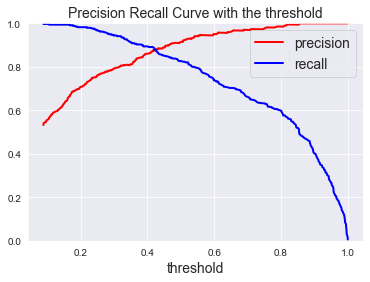

In [141]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(Y_train, ht_rfc_y_scores)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=2)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=2)
    plt.title('Precision Recall Curve with the threshold', fontsize=14)
    plt.xlabel("threshold", fontsize=14)
    plt.legend(loc="upper right", fontsize=14)
    plt.ylim([0, 1])

#plt.figure(figsize=(8, 5))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

#### ROC AUC Curve

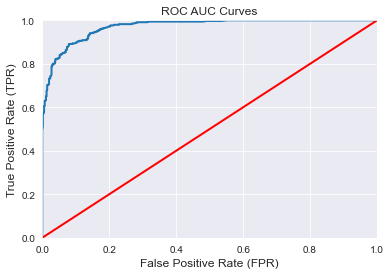

In [142]:
from sklearn.metrics import roc_curve

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, ht_rfc_y_scores)

# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.title('ROC AUC Curves', fontsize=12)
    plt.xlabel('False Positive Rate (FPR)', fontsize=12)
    plt.ylabel('True Positive Rate (TPR)', fontsize=12)

#plt.figure(figsize=(8, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [143]:
from sklearn.metrics import roc_auc_score
ht_rfc_roc_auc_score = roc_auc_score(Y_train, ht_rfc_y_scores)
print("After HT, RFC ROC-AUC-Score:", ht_rfc_roc_auc_score)

After HT, RFC ROC-AUC-Score: 0.9704604762422528


In [144]:
# Calculate log loss
from sklearn.metrics import log_loss
ht_rfc_log_loss = log_loss(Y_train, ht_rfc_y_scores)
print("After HT, RFC ROC_AUC =", ht_rfc_log_loss)

After HT, RFC ROC_AUC = 0.25085828383101183


### 10.2. Gaussian Naive Bayes Classifier

In [145]:
# GNB Mean cross validation score
cvs_ht_gnbc = cross_val_score(ht_gnbc, X_train, Y_train, scoring='accuracy', cv=10).mean()
print('GNB Cross validation score (after hyperparameter tuned) =', round(cvs_ht_gnbc*100,2), '%')

GNB Cross validation score (after hyperparameter tuned) = 79.68 %


In [146]:
# confusion matrix
ht_gnbc_cv_predict = cross_val_predict(ht_gnbc, X_train, Y_train, cv=10)
confusion_matrix(Y_train, ht_gnbc_cv_predict)

array([[456,  85],
       [ 94, 246]], dtype=int64)

In [147]:
# Precision & Recall
print("Precision (after hyperparameter tuned) :", precision_score(Y_train, ht_gnbc_cv_predict))
print("Recall (after hyperparameter tuned) :", recall_score(Y_train, ht_gnbc_cv_predict))

Precision (after hyperparameter tuned) : 0.743202416918429
Recall (after hyperparameter tuned) : 0.7235294117647059


In [148]:
# F1-Score
print("F1-Score (after hyperparameter tuned) :", f1_score(Y_train, ht_gnbc_cv_predict))

F1-Score (after hyperparameter tuned) : 0.7332339791356186


In [149]:
# Classification Report
print("Classification Report (after hyperparameter tuned)\n")
print(classification_report(Y_train, ht_gnbc_cv_predict, target_names=['Dead (0)', 'Survived (1)']))

Classification Report (after hyperparameter tuned)

              precision    recall  f1-score   support

    Dead (0)       0.83      0.84      0.84       541
Survived (1)       0.74      0.72      0.73       340

    accuracy                           0.80       881
   macro avg       0.79      0.78      0.78       881
weighted avg       0.80      0.80      0.80       881



#### Precision Recall Curve

In [150]:
# getting the probabilities of our predictions
ht_gnbc_y_scores = ht_gnbc.predict_proba(X_train)
ht_gnbc_y_scores = ht_gnbc_y_scores[:,1]

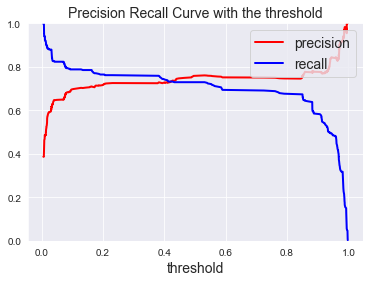

In [151]:
#
precision, recall, threshold = precision_recall_curve(Y_train, ht_gnbc_y_scores)

#plt.figure(figsize=(8, 5))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

#### ROC AUC Curve

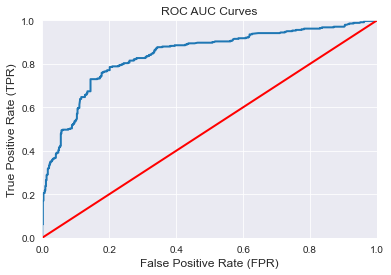

In [152]:
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, ht_gnbc_y_scores)

#plt.figure(figsize=(8, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [153]:
#
gnb_r_a_score = roc_auc_score(Y_train, ht_gnbc_y_scores)
print("After HT, ROC-AUC-Score:", gnb_r_a_score)

After HT, ROC-AUC-Score: 0.8413803414156791


In [154]:
# Calculate log loss
from sklearn.metrics import log_loss
ht_gnbc_log_loss = log_loss(Y_train, ht_gnbc_y_scores)
print("After HT, ROC_AUC =", ht_gnbc_log_loss)

After HT, ROC_AUC = 0.6578259615845061


## 11. Summary

In [155]:
from prettytable import PrettyTable

Table = PrettyTable(["Algorithm","Dicision Tree Classifier","Gaussian Naive Bayes Classifier"])
Table.align["Algorithm"]="r"
Table.align["Accuracy"]="l"
Table.add_row(["Accuracy Score (Before H.T.)", rf_accuracy*100, gnb_accuracy*100])
Table.add_row(["Cross Validation Score (Before H.T.)", rf_score*100, gnb_score*100])
Table.add_row(["Accuracy Score (After H.T.)", ht_rfc_accuracy*100, ht_gnbc_accuracy*100])   # H.T. - Hyperparameter Tuning
Table.add_row(["Cross Validation Score (After H.T.)", cvs_ht_rfc*100, cvs_ht_gnbc*100])   # H.T. - Hyperparameter Tuning 
print(Table)

+--------------------------------------+--------------------------+---------------------------------+
|                            Algorithm | Dicision Tree Classifier | Gaussian Naive Bayes Classifier |
+--------------------------------------+--------------------------+---------------------------------+
|         Accuracy Score (Before H.T.) |    98.41089670828603     |        79.45516458569807        |
| Cross Validation Score (Before H.T.) |    81.27553626149131     |        79.11516853932584        |
|          Accuracy Score (After H.T.) |    90.35187287173666     |        80.70374574347332        |
|  Cross Validation Score (After H.T.) |    83.77170582226763     |        79.68335035750768        |
+--------------------------------------+--------------------------+---------------------------------+


# 12. Final Submitions 

### 12.1. Decision Tree Classifier Submissions

In [156]:
# Create submission dataframe from Decision Tree Classifier tested

submit = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': ht_rfc_y_predictions})
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [157]:
submit.to_csv('RFC_submission.csv', index=False)

### 12.2. Naive Bayes Classifier Submissions

In [158]:
# Create submission dataframe from Naive Bayes Classifier tested

submit = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': ht_gnbc_y_predictions})
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [159]:
submit.to_csv('GNBC_submission.csv', index=False)